In [1]:
# Import All filenames in to dictionaries
import glob
dict_filename = {}
dict_filename['Intensity'] = glob.glob('./Intensity/*.csv')
dict_filename['Sleeping'] = glob.glob('./Sleeping/*.csv')
dict_filename['Resting'] = glob.glob('./Resting/*.csv')
dict_filename['AllStates'] = glob.glob('./All_states/*.csv')

In [2]:
# Showing all filenames
for state, filename in dict_filename.items():
    print(state + ' : ' + str(filename), end='\n\n')

Intensity : ['./Intensity/Subject01_2019-1-16_grouped_activity.csv', './Intensity/Subject02_2019-01-17_grouped_activity.csv', './Intensity/Subject03_2019-01-21_grouped_activity.csv', './Intensity/Subject09_2019-01-30_grouped_activity.csv', './Intensity/Subject08_2019-01-29_grouped_activity.csv', './Intensity/Subject05_2019-01-24_grouped_activity.csv', './Intensity/Subject06_2019-01-25_grouped_activity.csv', './Intensity/Subject04_2019-1-23_grouped_activity.csv', './Intensity/Subject10_2019-01-31_grouped_activity.csv', './Intensity/Subject07_2019-01-26_grouped_activity.csv']

Sleeping : ['./Sleeping/Subject10_2019-01-31_grouped_sleeping.csv', './Sleeping/Subject06_2019-01-25_grouped_sleeping.csv', './Sleeping/Subject09_2019-01-30_grouped_sleeping.csv', './Sleeping/Subject05_2019-01-24_grouped_sleeping.csv', './Sleeping/Subject07_2019-01-26_grouped_sleeping.csv', './Sleeping/Subject03_2019-01-21_grouped_sleeping.csv', './Sleeping/Subject04_2019-1-23_grouped_sleeping.csv', './Sleeping/Sub

# Training Random Forest Regression

## Training strategy
### 1. By states

    1.1.   Resting state
  
    1.2.   Sleeping state

    1.3.   Intensity state

### 2. All states

## Features


1.   Accelerometer(Vector), HR
2.   Freedson, HR
3.   Net Accelerometer, HR
4.   Net Accelerometer, Freedson, HR
5.   Abs(Accelerometer(Vector)), Freedson, HR
6.   Abs(Net Accelerometer), Freedson, HR






In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import LearningModel libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Empatica


In [4]:
# Dict storing MAE on testing set from best estimator(from every features) of fitbit
features = [['HR_empatica'], 
           ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica'], 
           ['PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'HR_empatica'], 
           ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']]
states = ['Resting', 'Sleeping', 'Intensity', 'AllStates']

mae_empatica_results_score = {}
mae_empatica_results_score['validation_set'] = {'Resting' : {}, 'Sleeping' : {}, 'Intensity' : {}, 'AllStates' : {}} 
mae_empatica_results_score['testing_set'] = {'Resting' : {}, 'Sleeping' : {}, 'Intensity' : {}, 'AllStates' : {}} 

for each_feature in features :
    for state in states :
        #print({str(each_feature) : []})
        mae_empatica_results_score['validation_set'][state][str(each_feature)] = {}
        mae_empatica_results_score['testing_set'][state][str(each_feature)] = {}


## Resting state

In [5]:
# Resting states

# Reading all files into dataframe
resting_df = []
resting_df_training = []
resting_df_testing = []
X_trainingset = pd.DataFrame()
y_trainingset = pd.DataFrame()
X_testset = pd.DataFrame()
y_testset = pd.DataFrame()
for filename in dict_filename['Resting']:
    # Loading the dataset into dataframe
    temp_resting_df = pd.read_csv(filename)
    print('Filename : ' + filename)
    print('Usable data(Including Accel and Freedson) : ' + str(len(temp_resting_df[['HR_biosignalsplux', 'HR_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded']].dropna())))
    
    temp_resting_df = temp_resting_df[['HR_biosignalsplux', 'HR_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'AX_empatica', 'AY_empatica', 'AZ_empatica']].dropna()
    # Create a absolute feature from Accelerometer
    temp_resting_df[['VectorA_empatica_abs', 'AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs']] = np.abs(temp_resting_df[['VectorA_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica']])
    X = temp_resting_df.loc[:, ['HR_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'VectorA_empatica_abs', 'AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs']]
    y = temp_resting_df.loc[:, ['HR_biosignalsplux']]
    
    # Splitting data into training and testing set for each subject to prevent subject imbalanced
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=np.random.randint(0, 10))

    X_trainingset = X_trainingset.append(X_train, ignore_index=True)
    y_trainingset = y_trainingset.append(y_train, ignore_index=True)
    X_testset = X_testset.append(X_test, ignore_index=True)
    y_testset = y_testset.append(y_test, ignore_index=True)
    print('--->X Shape : ' + str(X.shape))
    print('--->y Shape : ' + str(y.shape))
    print('--->X_train Shape : ' + str(X_train.shape))
    print('--->y_train Shape : ' + str(y_train.shape))
    print('--->X_test Shape : ' + str(X_test.shape))
    print('--->y_test Shape : ' + str(y_test.shape))
    print('--->X_trainingset Shape : ' + str(X_trainingset.shape))
    print('--->y_trainingset Shape : ' + str(y_trainingset.shape))
    print('--->X_testset Shape : ' + str(X_testset.shape))
    print('--->y_testset Shape : ' + str(y_testset.shape))
    print('\n\n')
    resting_df.append(temp_resting_df)
  
# Final shape of training set and testing set
print('*************************************************')
print('Final shape of Training set')
print('--->X_trainingset Shape : ' + str(X_trainingset.shape))
print('--->y_trainingset Shape : ' + str(y_trainingset.shape))
print('Final shape of Testing set')
print('--->X_testset Shape : ' + str(X_testset.shape))
print('--->y_testset Shape : ' + str(y_testset.shape))
print('*************************************************')


Filename : ./Resting/Subject03_2019-01-21_grouped_resting.csv
Usable data(Including Accel and Freedson) : 205
--->X Shape : (205, 10)
--->y Shape : (205, 1)
--->X_train Shape : (164, 10)
--->y_train Shape : (164, 1)
--->X_test Shape : (41, 10)
--->y_test Shape : (41, 1)
--->X_trainingset Shape : (164, 10)
--->y_trainingset Shape : (164, 1)
--->X_testset Shape : (41, 10)
--->y_testset Shape : (41, 1)



Filename : ./Resting/Subject05_2019-01-24_grouped_resting.csv
Usable data(Including Accel and Freedson) : 0
--->X Shape : (0, 10)
--->y Shape : (0, 1)
--->X_train Shape : (0, 10)
--->y_train Shape : (0, 1)
--->X_test Shape : (0, 10)
--->y_test Shape : (0, 1)
--->X_trainingset Shape : (164, 10)
--->y_trainingset Shape : (164, 1)
--->X_testset Shape : (41, 10)
--->y_testset Shape : (41, 1)



Filename : ./Resting/Subject07_2019-01-26_grouped_resting.csv
Usable data(Including Accel and Freedson) : 147
--->X Shape : (147, 10)
--->y Shape : (147, 1)
--->X_train Shape : (117, 10)
--->y_train S

In [6]:
display(X_trainingset.head(3))
display(y_trainingset.head(3))

,HR_empatica,AX_empatica,AY_empatica,AZ_empatica,VectorA_empatica,PA_lvl_VectorA_empatica_encoded,VectorA_empatica_abs,AX_empatica_abs,AY_empatica_abs,AZ_empatica_abs
0,83.47441,0.426136,0.015625,-0.262784,0.500912,3.0,0.500912,0.426136,0.015625,0.262784
1,83.47439,0.437500,0.024089,-0.240234,0.499712,2.0,0.499712,0.437500,0.024089,0.240234
2,75.29063,0.320312,0.085938,-0.375000,0.500610,2.0,0.500610,0.320312,0.085938,0.375000


,HR_biosignalsplux
0,82.570
1,84.715
2,76.270


In [7]:
# Declare training features for trying the best features
features = [['HR_empatica'], 
           ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica'], 
           ['PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'HR_empatica'], 
           ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']]

# Hyperparameters settings
# Maximun depth for dividing into a new leaf
max_depth = np.arange(1, 2)
# Number of estimator for majority vote
n_estimators = [25, 50]
# Stop criteria
criterion = ['mae']


# Start training
params_dict = {'n_estimators' : n_estimators, 'criterion' : criterion, 'max_depth' : max_depth}

regressor_resting_dict = {}
for each_feature in features:
    print('Regressor : {0}'.format(each_feature))
    rf_regressor = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params_dict, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, verbose=True, iid=True, return_train_score=True)
    regressor_resting_dict[str(each_feature)] = rf_regressor.fit(X_trainingset[each_feature].values, y_trainingset.values.reshape(-1))

Regressor : ['HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Regressor : ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.3s finished


Regressor : ['PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Regressor : ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.4s finished


Regressor : ['VectorA_empatica', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.4s finished


Regressor : ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.7s finished


Regressor : ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.7s finished


In [8]:
for regressor_name, regressor in regressor_resting_dict.items():
    temp_cv_results_ = pd.DataFrame(regressor.cv_results_)
    #print(temp_cv_results_.loc[temp_cv_results_['params'] == regressor.best_params_].loc[:, ['mean_test_score', 'std_test_score']])
    test_score_results = temp_cv_results_.loc[temp_cv_results_['params'] == regressor.best_params_].loc[:, ['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
    print('Test score(CV) : {0}'.format(test_score_results['mean_test_score'].values[0]))
    print('Std test score(CV) : {0}'.format(test_score_results['std_test_score'].values[0]))
    mae_empatica_results_score['validation_set']['Resting'][str(regressor_name)]['MAE_mean_test_score'] = test_score_results['mean_test_score'].values[0]
    mae_empatica_results_score['validation_set']['Resting'][str(regressor_name)]['MAE_std_test_score'] = test_score_results['std_test_score'].values[0]
    mae_empatica_results_score['validation_set']['Resting'][str(regressor_name)]['MAE_mean_train_score'] = test_score_results['mean_train_score'].values[0]
    mae_empatica_results_score['validation_set']['Resting'][str(regressor_name)]['MAE_std_train_score'] = test_score_results['std_train_score'].values[0]

    print('{0} : {1}'.format(regressor_name, regressor.best_score_))
    print('\n')

Test score(CV) : -4.207231206851669
Std test score(CV) : 1.1617835154152165
['HR_empatica'] : -4.207231206851669


Test score(CV) : -4.236573390689318
Std test score(CV) : 1.1803908742136704
['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica'] : -4.236573390689318


Test score(CV) : -4.220940754298413
Std test score(CV) : 1.1839377155278437
['PA_lvl_VectorA_empatica_encoded', 'HR_empatica'] : -4.220940754298413


Test score(CV) : -4.2250569153662765
Std test score(CV) : 1.1729517103010614
['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'] : -4.2250569153662765


Test score(CV) : -4.202902902562483
Std test score(CV) : 1.1852328674273838
['VectorA_empatica', 'HR_empatica'] : -4.202902902562483


Test score(CV) : -4.22772736335151
Std test score(CV) : 1.168639490669794
['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'] : -4.22772736335151


Test score(CV) : -4.202972486216449
Std test score(CV) : 1.1764621363518653
['AX_empatica_abs', '

Regressor name : ['HR_empatica']
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
MAE on testing set : 4.224524281106521
MAE_STD on testing set : 5.670153291957122



Regressor name : ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
MAE on testing set : 4.172579600035284

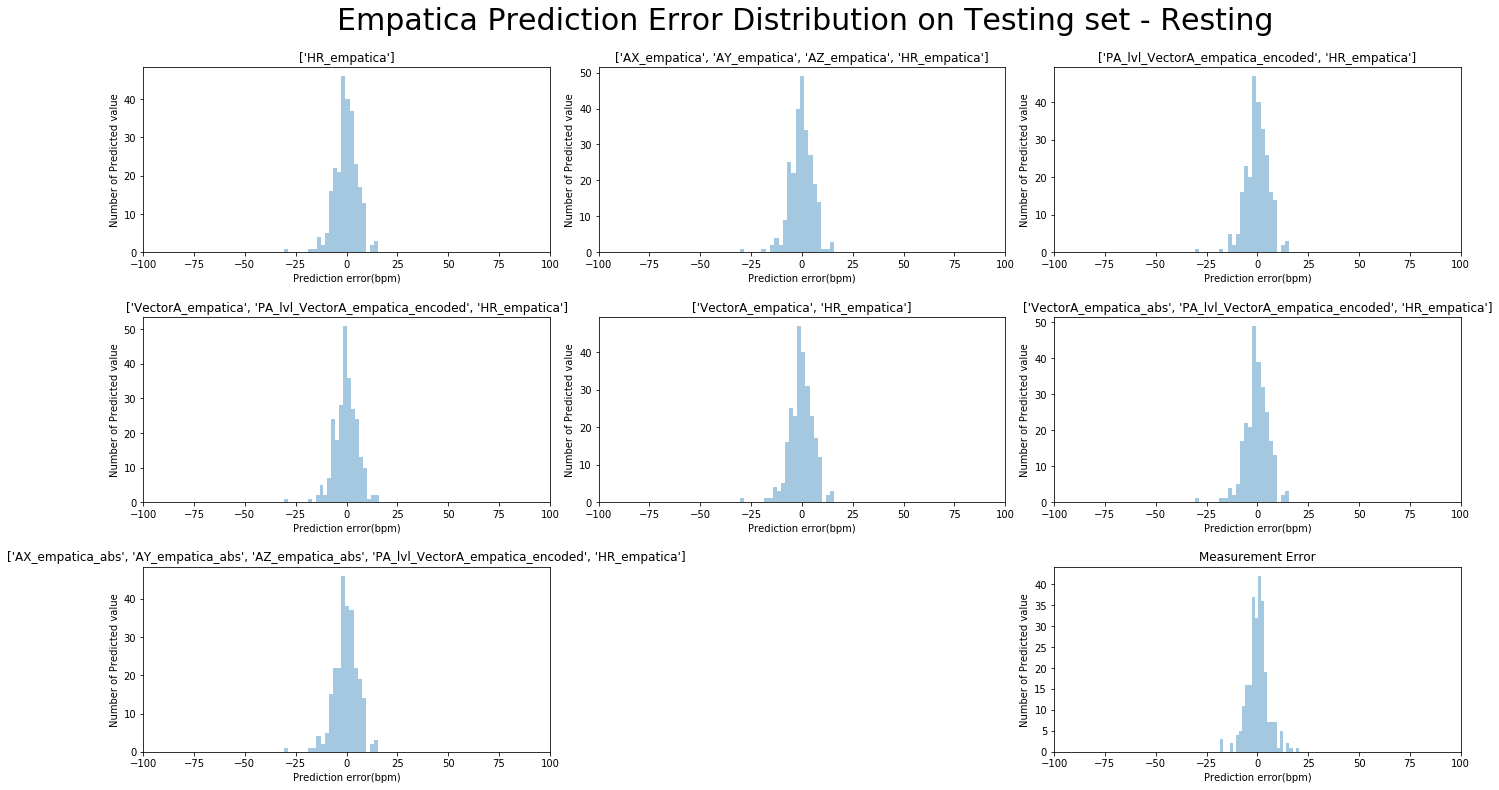

In [9]:
# Declare training features for testing the best features from best estimators on the testing set
i = 0

# Figure for each distribution plot
my_dpi = 96
fig = plt.figure(figsize=(1920/my_dpi, 1080/my_dpi))
plt.subplots_adjust(top=0.905,
bottom=0.06,
left=0.04,
right=0.955,
hspace=0.35,
wspace=0.12)
fig.suptitle('Empatica Prediction Error Distribution on Testing set - Resting', fontsize=30)

for regressor_name, regressor in regressor_resting_dict.items():
    print("Regressor name : {0}".format(regressor_name))
    print(regressor.best_estimator_)
    #print('Target : \n{0}'.format(y_testset.values.reshape(-1)))
    y_pred = regressor.best_estimator_.predict(X_testset[features[i]].values)
    #print('Prediction : \n{0}'.format(y_pred))
    #print('Error on testing set : {0}'.format(y_testset.values - y_pred))
    mae_empatica_results_score['testing_set']['Resting'][str(regressor_name)]['MAE_std_testingset_score'] = mean_absolute_error(y_testset.values.reshape(-1), y_pred.reshape(-1))
    mae_empatica_results_score['testing_set']['Resting'][str(regressor_name)]['MAE_mean_testingset_score'] = np.std(np.abs(y_testset.values.reshape(-1) - y_pred.reshape(-1)))
    print('MAE on testing set : {0}'.format(mean_absolute_error(y_testset.values.reshape(-1), y_pred.reshape(-1))))
    print('MAE_STD on testing set : {0}'.format(np.std(y_testset.values.reshape(-1)-y_pred.reshape(-1))))
    #print('MAE on testing set : {0}'.format(regressor.best_estimator_.score(X_testset[features[i]], y_testset.values.reshape(-1))))
    
    # Plotting the Error distribution
    axes = plt.subplot(3, 3, i+1)
    axes.set(xlabel='Prediction error(bpm)', ylabel='Number of Predicted value', title=regressor_name)
    sns.distplot((y_testset.values.reshape(-1) - y_pred.reshape(-1)), kde=False, ax=axes)    
    axes.set_xticks(np.arange(-100, 125, 25))
    
    print('\n\n')
    i = i+1

axes = plt.subplot(3, 3, i+2)
sns.distplot(y_testset.values.reshape(-1) - X_testset['HR_empatica'].values.reshape(-1), kde=False, ax=axes)
axes.set(xlabel='Prediction error(bpm)', ylabel='Number of Predicted value', title='Measurement Error')
axes.set_xticks(np.arange(-100, 125, 25))

i = i+1
fig.savefig('./ErrorDistribution_2/empatica_resting_error_dist', dpi=96, bbox_inches='tight')

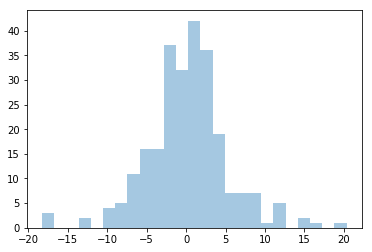

In [10]:
sns.distplot(y_testset.values.reshape(-1) - X_testset['HR_empatica'].values.reshape(-1), kde=False)

## Sleeping state

In [11]:
# Sleeping states

# Reading all files into dataframe
sleeping_df = []
X_trainingset = pd.DataFrame()
y_trainingset = pd.DataFrame()
X_testset = pd.DataFrame()
y_testset = pd.DataFrame()
for filename in dict_filename['Sleeping']:
    # Loading the dataset into dataframe
    temp_sleeping_df = pd.read_csv(filename)
    print('Filename : ' + filename)
    print('Usable data(Including Accel and Freedson) : ' + str(len(temp_sleeping_df[['HR_biosignalsplux', 'HR_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded']].dropna())))
    
    temp_sleeping_df = temp_sleeping_df[['HR_biosignalsplux', 'HR_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'AX_empatica', 'AY_empatica', 'AZ_empatica']].dropna()
    # Create a absolute feature from Accelerometer
    temp_sleeping_df[['VectorA_empatica_abs', 'AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs']] = np.abs(temp_sleeping_df[['VectorA_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica']])
    X = temp_sleeping_df.loc[:, ['HR_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'VectorA_empatica_abs', 'AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs']]
    y = temp_sleeping_df.loc[:, ['HR_biosignalsplux']]
    
    # Splitting data into training and testing set for each subject to prevent subject imbalanced
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=np.random.randint(0, 10))

    X_trainingset = X_trainingset.append(X_train, ignore_index=True)
    y_trainingset = y_trainingset.append(y_train, ignore_index=True)
    X_testset = X_testset.append(X_test, ignore_index=True)
    y_testset = y_testset.append(y_test, ignore_index=True)
    print('--->X Shape : ' + str(X.shape))
    print('--->y Shape : ' + str(y.shape))
    print('--->X_train Shape : ' + str(X_train.shape))
    print('--->y_train Shape : ' + str(y_train.shape))
    print('--->X_test Shape : ' + str(X_test.shape))
    print('--->y_test Shape : ' + str(y_test.shape))
    print('--->X_trainingset Shape : ' + str(X_trainingset.shape))
    print('--->y_trainingset Shape : ' + str(y_trainingset.shape))
    print('--->X_testset Shape : ' + str(X_testset.shape))
    print('--->y_testset Shape : ' + str(y_testset.shape))
    print('\n\n')
    sleeping_df.append(temp_sleeping_df)
  
# Final shape of training set and testing set
print('*************************************************')
print('Final shape of Training set')
print('--->X_trainingset Shape : ' + str(X_trainingset.shape))
print('--->y_trainingset Shape : ' + str(y_trainingset.shape))
print('Final shape of Testing set')
print('--->X_testset Shape : ' + str(X_testset.shape))
print('--->y_testset Shape : ' + str(y_testset.shape))
print('*************************************************')


Filename : ./Sleeping/Subject10_2019-01-31_grouped_sleeping.csv
Usable data(Including Accel and Freedson) : 692
--->X Shape : (692, 10)
--->y Shape : (692, 1)
--->X_train Shape : (553, 10)
--->y_train Shape : (553, 1)
--->X_test Shape : (139, 10)
--->y_test Shape : (139, 1)
--->X_trainingset Shape : (553, 10)
--->y_trainingset Shape : (553, 1)
--->X_testset Shape : (139, 10)
--->y_testset Shape : (139, 1)



Filename : ./Sleeping/Subject06_2019-01-25_grouped_sleeping.csv
Usable data(Including Accel and Freedson) : 184
--->X Shape : (184, 10)
--->y Shape : (184, 1)
--->X_train Shape : (147, 10)
--->y_train Shape : (147, 1)
--->X_test Shape : (37, 10)
--->y_test Shape : (37, 1)
--->X_trainingset Shape : (700, 10)
--->y_trainingset Shape : (700, 1)
--->X_testset Shape : (176, 10)
--->y_testset Shape : (176, 1)



Filename : ./Sleeping/Subject09_2019-01-30_grouped_sleeping.csv
Usable data(Including Accel and Freedson) : 822
--->X Shape : (822, 10)
--->y Shape : (822, 1)
--->X_train Shape :

In [12]:
temp_sleeping_df.head(3)

,HR_biosignalsplux,HR_empatica,VectorA_empatica,PA_lvl_VectorA_empatica_encoded,AX_empatica,AY_empatica,AZ_empatica,VectorA_empatica_abs,AX_empatica_abs,AY_empatica_abs,AZ_empatica_abs
68,63.126030,62.947890,0.494998,3.0,-0.328451,-0.233073,0.287760,0.494998,0.328451,0.233073,0.287760
69,64.062354,62.947910,0.495861,3.0,-0.329627,-0.233474,0.287560,0.495861,0.329627,0.233474,0.287560
83,67.948885,74.905615,0.495667,3.0,-0.332386,-0.231179,0.285866,0.495667,0.332386,0.231179,0.285866


In [13]:
# Declare training features for trying the best features
features = [['HR_empatica'], 
           ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica'], 
           ['PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'HR_empatica'], 
           ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']]

# Hyperparameters settings
# Maximun depth for dividing into a new leaf
max_depth = np.arange(1, 2)
# Number of estimator for majority vote
n_estimators = [25, 50]
# Stop criteria
criterion = ['mae']
# Start training
params_dict = {'n_estimators' : n_estimators, 'criterion' : criterion, 'max_depth' : max_depth}
               
regressor_sleeping_dict = {}
for each_feature in features:
    print('Regressor : {0}'.format(each_feature))
    rf_regressor = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params_dict, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, verbose=True, iid=True, return_train_score=True)
    regressor_sleeping_dict[str(each_feature)] = rf_regressor.fit(X_trainingset[each_feature].values, y_trainingset.values.reshape(-1))

Regressor : ['HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.7s finished


Regressor : ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   31.9s finished


Regressor : ['PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.4s finished


Regressor : ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   21.0s finished


Regressor : ['VectorA_empatica', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   20.0s finished


Regressor : ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.4s finished


Regressor : ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   34.8s finished


In [14]:
X_trainingset[['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']].head(4)

,VectorA_empatica_abs,PA_lvl_VectorA_empatica_encoded,HR_empatica
0,0.495918,2.0,49.22849
1,0.497430,2.0,47.40521
2,0.497467,2.0,71.10782
3,0.494327,2.0,61.93262


In [15]:
for regressor_name, regressor in regressor_sleeping_dict.items():
    temp_cv_results_ = pd.DataFrame(regressor.cv_results_)
    #print(temp_cv_results_.loc[temp_cv_results_['params'] == regressor.best_params_].loc[:, ['mean_test_score', 'std_test_score']])
    test_score_results = temp_cv_results_.loc[temp_cv_results_['params'] == regressor.best_params_].loc[:, ['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
    print('Test score(CV) : {0}'.format(test_score_results['mean_test_score'].values[0]))
    print('Std test score(CV) : {0}'.format(test_score_results['std_test_score'].values[0]))
    mae_empatica_results_score['validation_set']['Sleeping'][str(regressor_name)]['MAE_mean_test_score'] = test_score_results['mean_test_score'].values[0]
    mae_empatica_results_score['validation_set']['Sleeping'][str(regressor_name)]['MAE_std_test_score'] = test_score_results['std_test_score'].values[0]
    mae_empatica_results_score['validation_set']['Sleeping'][str(regressor_name)]['MAE_mean_train_score'] = test_score_results['mean_train_score'].values[0]
    mae_empatica_results_score['validation_set']['Sleeping'][str(regressor_name)]['MAE_std_train_score'] = test_score_results['std_train_score'].values[0]

    print('{0} : {1}'.format(regressor_name, regressor.best_score_))
    print('\n')

Test score(CV) : -4.76262279837741
Std test score(CV) : 1.835050259104021
['HR_empatica'] : -4.76262279837741


Test score(CV) : -4.7610979555163535
Std test score(CV) : 1.8434122755153062
['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica'] : -4.7610979555163535


Test score(CV) : -4.757141405828815
Std test score(CV) : 1.8462986757521127
['PA_lvl_VectorA_empatica_encoded', 'HR_empatica'] : -4.757141405828815


Test score(CV) : -4.758850534426114
Std test score(CV) : 1.840296455826657
['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'] : -4.758850534426114


Test score(CV) : -4.758882184573209
Std test score(CV) : 1.8300313304465834
['VectorA_empatica', 'HR_empatica'] : -4.758882184573209


Test score(CV) : -4.771268076862272
Std test score(CV) : 1.8420998062714078
['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'] : -4.771268076862272


Test score(CV) : -4.771589056768101
Std test score(CV) : 1.8542768421116298
['AX_empatica_abs', 'A

Regressor name : ['HR_empatica']
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
MAE on testing set : 4.649719966262145
MAE_STD on testing set : 8.075739467085592



Regressor name : ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
MAE on testing set : 4.661141448925709

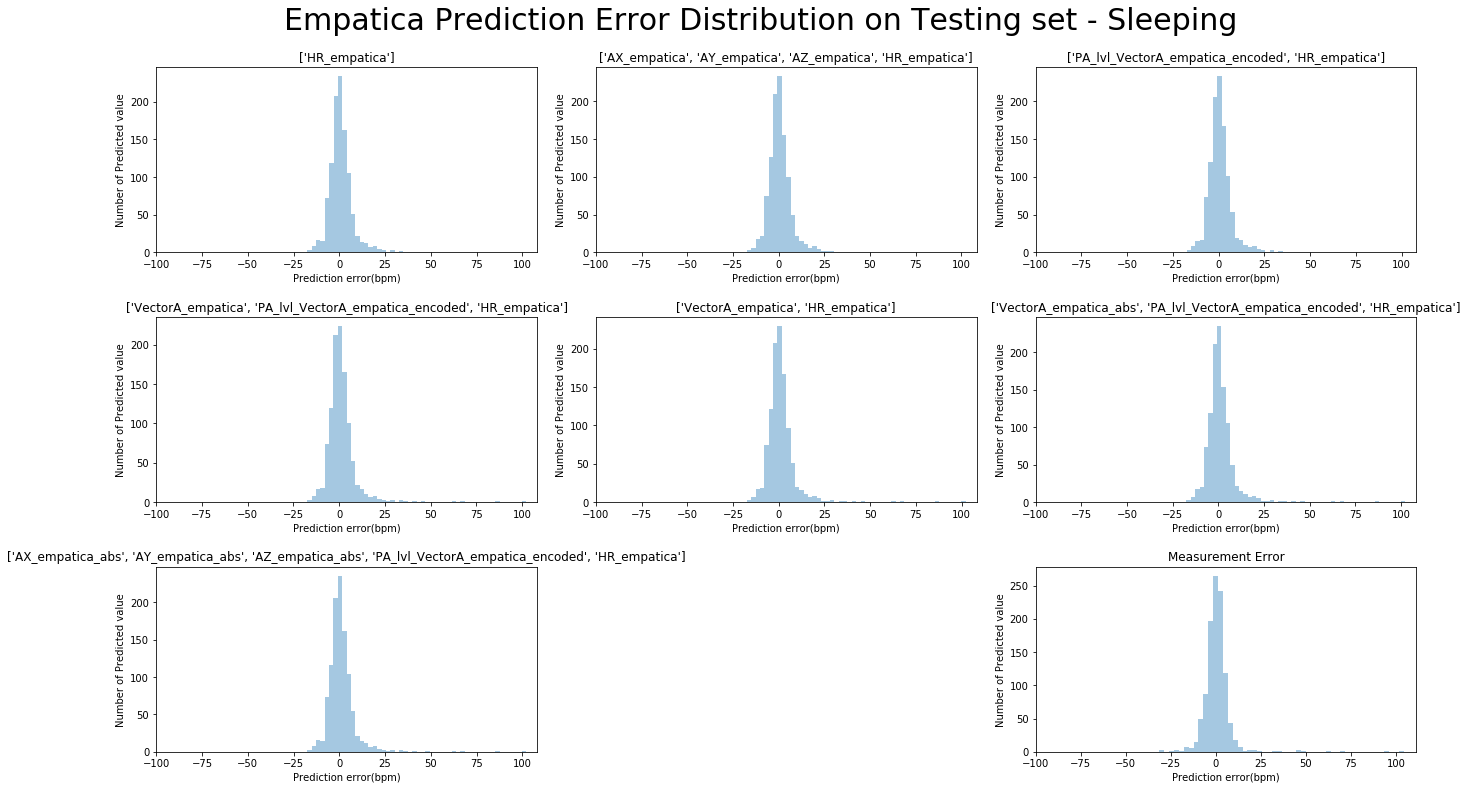

In [16]:
# Declare training features for testing the best features from best estimators on the testing set
features = [['HR_empatica'], 
           ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica'], 
           ['PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'HR_empatica'], 
           ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']]
# Declare training features for testing the best features from best estimators on the testing set
i = 0
# Figure for each distribution plot
my_dpi = 96
fig = plt.figure(figsize=(1920/my_dpi, 1080/my_dpi))
plt.subplots_adjust(top=0.905,
bottom=0.06,
left=0.08,
right=0.955,
hspace=0.35,
wspace=0.155)
fig.suptitle('Empatica Prediction Error Distribution on Testing set - Sleeping', fontsize=30)


for regressor_name, regressor in regressor_sleeping_dict.items():
    print("Regressor name : {0}".format(regressor_name))
    print(regressor.best_estimator_)
    #print('Target : \n{0}'.format(y_testset.values.reshape(-1)))
    y_pred = regressor.best_estimator_.predict(X_testset[features[i]].values)
    #print('Prediction : \n{0}'.format(y_pred))
    #print('Error on testing set : {0}'.format(y_testset.values - y_pred))
    mae_empatica_results_score['testing_set']['Sleeping'][str(regressor_name)]['MAE_std_testingset_score'] = mean_absolute_error(y_testset.values.reshape(-1), y_pred.reshape(-1))
    mae_empatica_results_score['testing_set']['Sleeping'][str(regressor_name)]['MAE_mean_testingset_score'] = np.std(np.abs(y_testset.values.reshape(-1) - y_pred.reshape(-1)))
    print('MAE on testing set : {0}'.format(mean_absolute_error(y_testset.values.reshape(-1), y_pred.reshape(-1))))
    print('MAE_STD on testing set : {0}'.format(np.std(y_testset.values.reshape(-1)-y_pred.reshape(-1))))
    #print('MAE on testing set : {0}'.format(regressor.best_estimator_.score(X_testset[features[i]], y_testset.values.reshape(-1))))
    # Plotting the Error distribution
    axes = plt.subplot(3, 3, i+1)
    axes.set(xlabel='Prediction error(bpm)', ylabel='Number of Predicted value', title=regressor_name)
    sns.distplot(y_testset.values.reshape(-1) - y_pred.reshape(-1), kde=False, ax=axes)    
    axes.set_xticks(np.arange(-100, 125, 25))
    
    
    
    print('\n\n')
    i = i+1
axes = plt.subplot(3, 3, i+2)
sns.distplot(y_testset.values.reshape(-1) - X_testset['HR_empatica'].values.reshape(-1), kde=False, ax=axes)
axes.set(xlabel='Prediction error(bpm)', ylabel='Number of Predicted value', title='Measurement Error')
axes.set_xticks(np.arange(-100, 125, 25))
    
fig.savefig('./ErrorDistribution_2/empatica_sleeping_error_dist', dpi=96, bbox_inches='tight')

## Intensity state

In [17]:
# Intensity states

# Reading all files into dataframe
intensity_df = []
X_trainingset = pd.DataFrame()
y_trainingset = pd.DataFrame()
X_testset = pd.DataFrame()
y_testset = pd.DataFrame()
for filename in dict_filename['Intensity']:
    # Loading the dataset into dataframe
    temp_intensity_df = pd.read_csv(filename)
    print('Filename : ' + filename)
    print('Usable data(Including Accel and Freedson) : ' + str(len(temp_intensity_df[['HR_polarh10', 'HR_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded']].dropna())))
    
    temp_intensity_df = temp_intensity_df[['HR_polarh10', 'HR_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'AX_empatica', 'AY_empatica', 'AZ_empatica']].dropna()
    # Create a absolute feature from Accelerometer
    temp_intensity_df[['VectorA_empatica_abs', 'AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs']] = np.abs(temp_intensity_df[['VectorA_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica']])
    X = temp_intensity_df.loc[:, ['HR_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'VectorA_empatica_abs', 'AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs']]
    y = temp_intensity_df.loc[:, ['HR_polarh10']]
    
    # Splitting data into training and testing set for each subject to prevent subject imbalanced
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=np.random.randint(0, 10))

    X_trainingset = X_trainingset.append(X_train, ignore_index=True)
    y_trainingset = y_trainingset.append(y_train, ignore_index=True)
    X_testset = X_testset.append(X_test, ignore_index=True)
    y_testset = y_testset.append(y_test, ignore_index=True)
    print('--->X Shape : ' + str(X.shape))
    print('--->y Shape : ' + str(y.shape))
    print('--->X_train Shape : ' + str(X_train.shape))
    print('--->y_train Shape : ' + str(y_train.shape))
    print('--->X_test Shape : ' + str(X_test.shape))
    print('--->y_test Shape : ' + str(y_test.shape))
    print('--->X_trainingset Shape : ' + str(X_trainingset.shape))
    print('--->y_trainingset Shape : ' + str(y_trainingset.shape))
    print('--->X_testset Shape : ' + str(X_testset.shape))
    print('--->y_testset Shape : ' + str(y_testset.shape))
    print('\n\n')
    intensity_df.append(temp_intensity_df)
  
# Final shape of training set and testing set
print('*************************************************')
print('Final shape of Training set')
print('--->X_trainingset Shape : ' + str(X_trainingset.shape))
print('--->y_trainingset Shape : ' + str(y_trainingset.shape))
print('Final shape of Testing set')
print('--->X_testset Shape : ' + str(X_testset.shape))
print('--->y_testset Shape : ' + str(y_testset.shape))
print('*************************************************')


Filename : ./Intensity/Subject01_2019-1-16_grouped_activity.csv
Usable data(Including Accel and Freedson) : 178
--->X Shape : (178, 10)
--->y Shape : (178, 1)
--->X_train Shape : (142, 10)
--->y_train Shape : (142, 1)
--->X_test Shape : (36, 10)
--->y_test Shape : (36, 1)
--->X_trainingset Shape : (142, 10)
--->y_trainingset Shape : (142, 1)
--->X_testset Shape : (36, 10)
--->y_testset Shape : (36, 1)



Filename : ./Intensity/Subject02_2019-01-17_grouped_activity.csv
Usable data(Including Accel and Freedson) : 139
--->X Shape : (139, 10)
--->y Shape : (139, 1)
--->X_train Shape : (111, 10)
--->y_train Shape : (111, 1)
--->X_test Shape : (28, 10)
--->y_test Shape : (28, 1)
--->X_trainingset Shape : (253, 10)
--->y_trainingset Shape : (253, 1)
--->X_testset Shape : (64, 10)
--->y_testset Shape : (64, 1)



Filename : ./Intensity/Subject03_2019-01-21_grouped_activity.csv
Usable data(Including Accel and Freedson) : 23
--->X Shape : (23, 10)
--->y Shape : (23, 1)
--->X_train Shape : (18, 1

In [18]:
# Declare training features for trying the best features
features = [['HR_empatica'], 
           ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica'], 
           ['PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'HR_empatica'], 
           ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']]


# Hyperparameters settings
# Maximun depth for dividing into a new leaf
max_depth = np.arange(1, 2)
# Number of estimator for majority vote
n_estimators = [25, 50]
# Stop criteria
criterion = ['mae']


# Start training
params_dict = {'n_estimators' : n_estimators, 'criterion' : criterion, 'max_depth' : max_depth}
regressor_intensity_dict = {}
for each_feature in features:
    print('Regressor : {0}'.format(each_feature))
    rf_regressor = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params_dict, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, verbose=True, iid=True, return_train_score=True)
    regressor_intensity_dict[str(each_feature)] = rf_regressor.fit(X_trainingset[each_feature].values, y_trainingset.values.reshape(-1))

Regressor : ['HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Regressor : ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.3s finished


Regressor : ['PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.9s finished


Regressor : ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Regressor : ['VectorA_empatica', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.0s finished


Regressor : ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.2s finished


Regressor : ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.7s finished


In [19]:
for regressor_name, regressor in regressor_intensity_dict.items():
    temp_cv_results_ = pd.DataFrame(regressor.cv_results_)
    #print(temp_cv_results_.loc[temp_cv_results_['params'] == regressor.best_params_].loc[:, ['mean_test_score', 'std_test_score']])
    test_score_results = temp_cv_results_.loc[temp_cv_results_['params'] == regressor.best_params_].loc[:, ['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
    print('Test score(CV) : {0}'.format(test_score_results['mean_test_score'].values[0]))
    print('Std test score(CV) : {0}'.format(test_score_results['std_test_score'].values[0]))
    mae_empatica_results_score['validation_set']['Intensity'][str(regressor_name)]['MAE_mean_test_score'] = test_score_results['mean_test_score'].values[0]
    mae_empatica_results_score['validation_set']['Intensity'][str(regressor_name)]['MAE_std_test_score'] = test_score_results['std_test_score'].values[0]
    mae_empatica_results_score['validation_set']['Intensity'][str(regressor_name)]['MAE_mean_train_score'] = test_score_results['mean_train_score'].values[0]
    mae_empatica_results_score['validation_set']['Intensity'][str(regressor_name)]['MAE_std_train_score'] = test_score_results['std_train_score'].values[0]

    print('{0} : {1}'.format(regressor_name, regressor.best_score_))
    print('\n')

Test score(CV) : -8.323817787418655
Std test score(CV) : 1.7966475400614674
['HR_empatica'] : -8.323817787418655


Test score(CV) : -8.317353579175705
Std test score(CV) : 1.8836116525909083
['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica'] : -8.317353579175705


Test score(CV) : -8.30644251626898
Std test score(CV) : 1.7901926727372233
['PA_lvl_VectorA_empatica_encoded', 'HR_empatica'] : -8.30644251626898


Test score(CV) : -8.33594360086768
Std test score(CV) : 1.806442455183306
['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'] : -8.33594360086768


Test score(CV) : -8.352049891540132
Std test score(CV) : 1.7951473982980517
['VectorA_empatica', 'HR_empatica'] : -8.352049891540132


Test score(CV) : -8.371583514099784
Std test score(CV) : 1.8818013890381164
['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'] : -8.371583514099784


Test score(CV) : -8.320802603036876
Std test score(CV) : 1.8780823255607135
['AX_empatica_abs', 'AY_e

Regressor name : ['HR_empatica']
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
MAE on testing set : 8.77196581196581
MAE_STD on testing set : 12.325271503484096



Regressor name : ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
MAE on testing set : 8.807264957264957

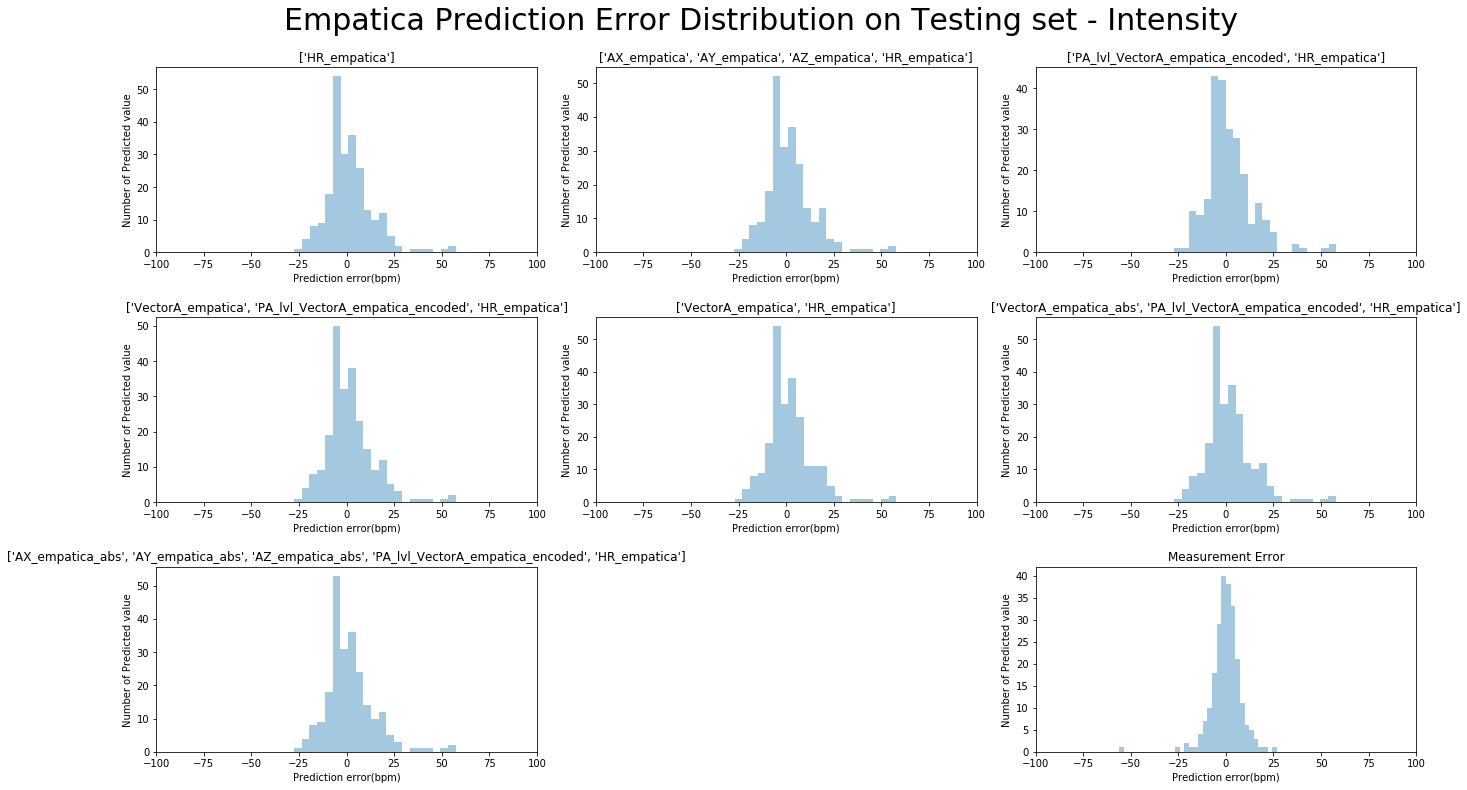

In [20]:
# Declare training features for testing the best features from best estimators on the testing set
features = [['HR_empatica'], 
           ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica'], 
           ['PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'HR_empatica'], 
           ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']]
# Declare training features for testing the best features from best estimators on the testing set
i = 0

# Figure for each distribution plot
my_dpi = 96
fig = plt.figure(figsize=(1920/my_dpi, 1080/my_dpi))
plt.subplots_adjust(top=0.905,
bottom=0.06,
left=0.08,
right=0.955,
hspace=0.35,
wspace=0.155)
fig.suptitle('Empatica Prediction Error Distribution on Testing set - Intensity', fontsize=30)


for regressor_name, regressor in regressor_intensity_dict.items():
    print("Regressor name : {0}".format(regressor_name))
    print(regressor.best_estimator_)
    #print('Target : \n{0}'.format(y_testset.values.reshape(-1)))
    y_pred = regressor.best_estimator_.predict(X_testset[features[i]].values)
    #print('Prediction : \n{0}'.format(y_pred))
    #print('Error on testing set : {0}'.format(y_testset.values - y_pred))
    mae_empatica_results_score['testing_set']['Intensity'][str(regressor_name)]['MAE_std_testingset_score'] = mean_absolute_error(y_testset.values.reshape(-1), y_pred.reshape(-1))
    mae_empatica_results_score['testing_set']['Intensity'][str(regressor_name)]['MAE_mean_testingset_score'] = np.std(np.abs(y_testset.values.reshape(-1) - y_pred.reshape(-1)))
    print('MAE on testing set : {0}'.format(mean_absolute_error(y_testset.values.reshape(-1), y_pred.reshape(-1))))
    print('MAE_STD on testing set : {0}'.format(np.std(y_testset.values.reshape(-1)-y_pred.reshape(-1))))
    #print('MAE on testing set : {0}'.format(regressor.best_estimator_.score(X_testset[features[i]], y_testset.values.reshape(-1))))
    print('\n\n')
    
    # Plotting the Error distribution
    axes = plt.subplot(3, 3, i+1)
    axes.set(xlabel='Prediction error(bpm)', ylabel='Number of Predicted value', title=regressor_name)
    sns.distplot(y_testset.values.reshape(-1) - y_pred.reshape(-1), kde=False, ax=axes)    
    axes.set_xticks(np.arange(-100, 125, 25))    
    i = i+1
    
axes = plt.subplot(3, 3, i+2)
sns.distplot(y_testset.values.reshape(-1) - X_testset['HR_empatica'].values.reshape(-1), kde=False, ax=axes)
axes.set(xlabel='Prediction error(bpm)', ylabel='Number of Predicted value', title='Measurement Error')
axes.set_xticks(np.arange(-100, 125, 25))
fig.savefig('./ErrorDistribution_2/empatica_intensity_error_dist', dpi=96, bbox_inches='tight')

## All states : Resting + Sleeping + Intensity

In [21]:
# All states

# Reading all files into dataframe
all_states_df = []
X_trainingset = pd.DataFrame()
y_trainingset = pd.DataFrame()
X_testset = pd.DataFrame()
y_testset = pd.DataFrame()
for filename in dict_filename['AllStates']:
    # Loading the dataset into dataframe
    temp_allstates_df = pd.read_csv(filename)
    print('Filename : ' + filename)
    
    # For resting and sleeping part
    temp_resting_sleeping = temp_allstates_df[['HR_biosignalsplux', 'HR_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'AX_empatica', 'AY_empatica', 'AZ_empatica']].dropna()
    # Create a absolute feature from Accelerometer
    temp_resting_sleeping[['VectorA_empatica_abs', 'AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs']] = np.abs(temp_resting_sleeping[['VectorA_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica']])
    X = temp_resting_sleeping.loc[:, ['HR_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'VectorA_empatica_abs', 'AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs']]
    y = temp_resting_sleeping.loc[:, ['HR_biosignalsplux']]
    
    # Splitting data into training and testing set for each subject to prevent subject imbalanced
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=np.random.randint(0, 10))

    X_trainingset = X_trainingset.append(X_train, ignore_index=True)
    y_trainingset = y_trainingset.append(y_train, ignore_index=True)
    X_testset = X_testset.append(X_test, ignore_index=True)
    y_testset = y_testset.append(y_test, ignore_index=True)
    print('=>Resting and Sleeping')
    print('Usable data(Including Accel and Freedson) : ' + str(len(temp_allstates_df[['HR_biosignalsplux', 'HR_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded']].dropna())))
    print('--->X Shape : ' + str(X.shape))
    print('--->y Shape : ' + str(y.shape))
    print('--->X_train Shape : ' + str(X_train.shape))
    print('--->y_train Shape : ' + str(y_train.shape))
    print('--->X_test Shape : ' + str(X_test.shape))
    print('--->y_test Shape : ' + str(y_test.shape))
    print('--->X_trainingset Shape : ' + str(X_trainingset.shape))
    print('--->y_trainingset Shape : ' + str(y_trainingset.shape))
    print('--->X_testset Shape : ' + str(X_testset.shape))
    print('--->y_testset Shape : ' + str(y_testset.shape))
    print('\n')

    # For Intensity
    temp_intensity = temp_allstates_df[['HR_polarh10', 'HR_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'AX_empatica', 'AY_empatica', 'AZ_empatica']].dropna()
    # Create a absolute feature from Accelerometer
    temp_intensity[['VectorA_empatica_abs', 'AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs']] = np.abs(temp_intensity[['VectorA_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica']])
    X = temp_intensity.loc[:, ['HR_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'VectorA_empatica_abs', 'AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs']]
    y = temp_intensity.loc[:, ['HR_polarh10']]
    
    # Splitting data into training and testing set for each subject to prevent subject imbalanced
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=np.random.randint(0, 10))

    X_trainingset = X_trainingset.append(X_train, ignore_index=True)
    y_trainingset = y_trainingset.append(y_train, ignore_index=True)
    X_testset = X_testset.append(X_test, ignore_index=True)
    y_testset = y_testset.append(y_test, ignore_index=True)
    print('=>Intensity')
    print('Usable data(Including Accel and Freedson) : ' + str(len(temp_allstates_df[['HR_polarh10', 'HR_empatica', 'AX_empatica', 'AY_empatica', 'AZ_empatica', 'VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded']].dropna())))
    print('--->X Shape : ' + str(X.shape))
    print('--->y Shape : ' + str(y.shape))
    print('--->X_train Shape : ' + str(X_train.shape))
    print('--->y_train Shape : ' + str(y_train.shape))
    print('--->X_test Shape : ' + str(X_test.shape))
    print('--->y_test Shape : ' + str(y_test.shape))
    print('--->X_trainingset Shape : ' + str(X_trainingset.shape))
    print('--->y_trainingset Shape : ' + str(y_trainingset.shape))
    print('--->X_testset Shape : ' + str(X_testset.shape))
    print('--->y_testset Shape : ' + str(y_testset.shape))
    print('\n')
    
    all_states_df.append(temp_allstates_df)
    
# Final shape of training set and testing set
print('*************************************************')
print('Final shape of Training set')
print('--->X_trainingset Shape : ' + str(X_trainingset.shape))
print('--->y_trainingset Shape : ' + str(y_trainingset.shape))
print('Final shape of Testing set')
print('--->X_testset Shape : ' + str(X_testset.shape))
print('--->y_testset Shape : ' + str(y_testset.shape))
print('*************************************************')


Filename : ./All_states/Subject10_2019-01-31_grouped_all_states.csv
=>Resting and Sleeping
Usable data(Including Accel and Freedson) : 900
--->X Shape : (900, 10)
--->y Shape : (900, 1)
--->X_train Shape : (720, 10)
--->y_train Shape : (720, 1)
--->X_test Shape : (180, 10)
--->y_test Shape : (180, 1)
--->X_trainingset Shape : (720, 10)
--->y_trainingset Shape : (720, 1)
--->X_testset Shape : (180, 10)
--->y_testset Shape : (180, 1)


=>Intensity
Usable data(Including Accel and Freedson) : 103
--->X Shape : (103, 10)
--->y Shape : (103, 1)
--->X_train Shape : (82, 10)
--->y_train Shape : (82, 1)
--->X_test Shape : (21, 10)
--->y_test Shape : (21, 1)
--->X_trainingset Shape : (802, 10)
--->y_trainingset Shape : (802, 2)
--->X_testset Shape : (201, 10)
--->y_testset Shape : (201, 2)


Filename : ./All_states/Subject05_2019-01-24_grouped_all_states.csv
=>Resting and Sleeping
Usable data(Including Accel and Freedson) : 1131
--->X Shape : (1131, 10)
--->y Shape : (1131, 1)
--->X_train Shape 

In [22]:
# Merging 2 columns and fillna with 0 (cause of different baseline)
y_trainingset = np.sum(y_trainingset.fillna(0).values, axis=1).reshape(-1)
y_testset = np.sum(y_testset.fillna(0).values, axis=1).reshape(-1)

In [23]:
print(y_trainingset.shape)

(7007,)


In [24]:
# Declare training features for trying the best features
features = [['HR_empatica'], 
           ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica'], 
           ['PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'HR_empatica'], 
           ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']]


# Hyperparameters settings
# Maximun depth for dividing into a new leaf
max_depth = np.arange(1, 2)
# Number of estimator for majority vote
n_estimators = [25, 50]
# Stop criteria
criterion = ['mae']


# Start training
params_dict = {'n_estimators' : n_estimators, 'criterion' : criterion, 'max_depth' : max_depth}
regressor_allstates_dict = {}
for each_feature in features:
    print('Regressor : {0}'.format(each_feature))
    rf_regressor = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params_dict, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, verbose=True, iid=True, return_train_score=True)
    regressor_allstates_dict[str(each_feature)] = rf_regressor.fit(X_trainingset[each_feature].values, y_trainingset.reshape(-1))

Regressor : ['HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.6s finished


Regressor : ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished


Regressor : ['PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.7s finished


Regressor : ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   48.0s finished


Regressor : ['VectorA_empatica', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   42.9s finished


Regressor : ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   49.5s finished


Regressor : ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished


In [25]:
for regressor_name, regressor in regressor_allstates_dict.items():
    temp_cv_results_ = pd.DataFrame(regressor.cv_results_)
    #print(temp_cv_results_.loc[temp_cv_results_['params'] == regressor.best_params_].loc[:, ['mean_test_score', 'std_test_score']])
    test_score_results = temp_cv_results_.loc[temp_cv_results_['params'] == regressor.best_params_].loc[:, ['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
    print('Test score(CV) : {0}'.format(test_score_results['mean_test_score'].values[0]))
    print('Std test score(CV) : {0}'.format(test_score_results['std_test_score'].values[0]))
    mae_empatica_results_score['validation_set']['AllStates'][str(regressor_name)]['MAE_mean_test_score'] = test_score_results['mean_test_score'].values[0]
    mae_empatica_results_score['validation_set']['AllStates'][str(regressor_name)]['MAE_std_test_score'] = test_score_results['std_test_score'].values[0]
    mae_empatica_results_score['validation_set']['AllStates'][str(regressor_name)]['MAE_mean_train_score'] = test_score_results['mean_train_score'].values[0]
    mae_empatica_results_score['validation_set']['AllStates'][str(regressor_name)]['MAE_std_train_score'] = test_score_results['std_train_score'].values[0]

    print('{0} : {1}'.format(regressor_name, regressor.best_score_))
    print('\n')

Test score(CV) : -7.710338569589885
Std test score(CV) : 2.2033532913847704
['HR_empatica'] : -7.710338569589885


Test score(CV) : -7.70953521121387
Std test score(CV) : 2.1766822575804694
['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica'] : -7.70953521121387


Test score(CV) : -7.6914562570185705
Std test score(CV) : 2.2080330598475237
['PA_lvl_VectorA_empatica_encoded', 'HR_empatica'] : -7.6914562570185705


Test score(CV) : -7.722113980319745
Std test score(CV) : 2.208260314123307
['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'] : -7.722113980319745


Test score(CV) : -7.713682265675827
Std test score(CV) : 2.2005331731183
['VectorA_empatica', 'HR_empatica'] : -7.713682265675827


Test score(CV) : -7.733712417039312
Std test score(CV) : 2.189726351069193
['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'] : -7.733712417039312


Test score(CV) : -7.716717211870911
Std test score(CV) : 2.2158330449474755
['AX_empatica_abs', 'AY_e

Regressor name : ['HR_empatica']
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
MAE on testing set : 7.677126071735312
MAE_STD on testing set : 12.404377245278956



Regressor name : ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
MAE on testing set : 7.64753232901809

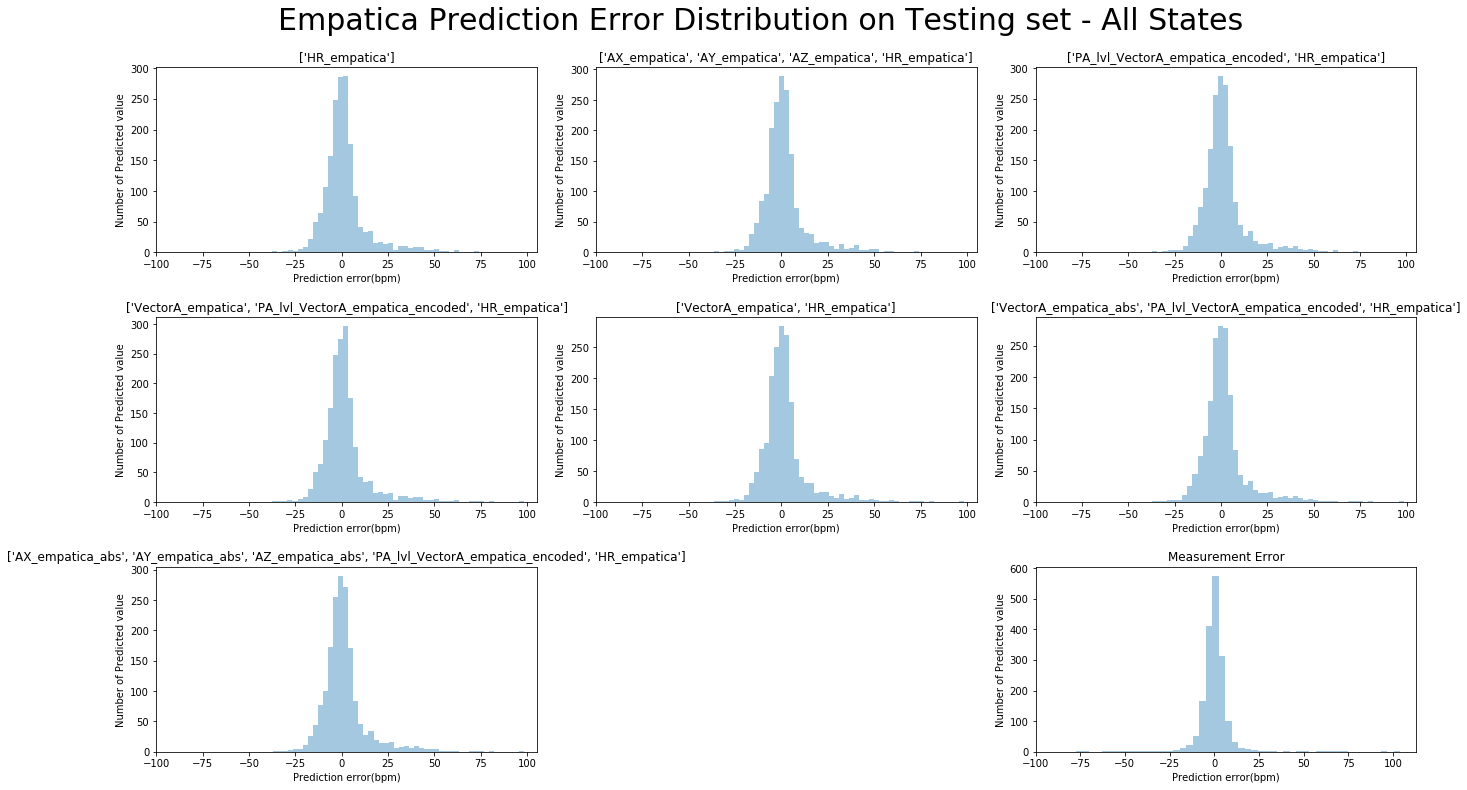

In [26]:
# Declare training features for testing the best features from best estimators on the testing set

features = [['HR_empatica'], 
           ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica'], 
           ['PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'HR_empatica'], 
           ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']]
# Declare training features for testing the best features from best estimators on the testing set
i = 0

# Figure for each distribution plot
my_dpi = 96
fig = plt.figure(figsize=(1920/my_dpi, 1080/my_dpi))
plt.subplots_adjust(top=0.905,
bottom=0.06,
left=0.08,
right=0.955,
hspace=0.35,
wspace=0.155)
fig.suptitle('Empatica Prediction Error Distribution on Testing set - All States', fontsize=30)


for regressor_name, regressor in regressor_allstates_dict.items():
    print("Regressor name : {0}".format(regressor_name))
    print(regressor.best_estimator_)
    #print('Target : \n{0}'.format(y_testset.values.reshape(-1)))
    y_pred = regressor.best_estimator_.predict(X_testset[features[i]].values)
    #print('Prediction : \n{0}'.format(y_pred))
    #print('Error on testing set : {0}'.format(y_testset.values - y_pred))
    mae_empatica_results_score['testing_set']['AllStates'][str(regressor_name)]['MAE_std_testingset_score'] = mean_absolute_error(y_testset.reshape(-1), y_pred.reshape(-1))
    mae_empatica_results_score['testing_set']['AllStates'][str(regressor_name)]['MAE_mean_testingset_score'] = np.std(np.abs(y_testset.reshape(-1) - y_pred.reshape(-1)))
    print('MAE on testing set : {0}'.format(mean_absolute_error(y_testset.reshape(-1), y_pred.reshape(-1))))
    print('MAE_STD on testing set : {0}'.format(np.std(y_testset.reshape(-1)-y_pred.reshape(-1))))
    #print('MAE on testing set : {0}'.format(regressor.best_estimator_.score(X_testset[features[i]], y_testset.values.reshape(-1))))
    
    # Plotting the Error distribution
    axes = plt.subplot(3, 3, i+1)
    axes.set(xlabel='Prediction error(bpm)', ylabel='Number of Predicted value', title=regressor_name)
    sns.distplot(y_testset.reshape(-1) - y_pred.reshape(-1), kde=False, ax=axes)    
    axes.set_xticks(np.arange(-100, 125, 25))

    print('\n\n')
    i = i+1

axes = plt.subplot(3, 3, i+2)
sns.distplot(y_testset.reshape(-1) - X_testset['HR_empatica'].values.reshape(-1), kde=False, ax=axes)
axes.set(xlabel='Prediction error(bpm)', ylabel='Number of Predicted value', title='Measurement Error')
axes.set_xticks(np.arange(-100, 125, 25))    
fig.savefig('./ErrorDistribution_2/empatica_allstates_error_dist', dpi=96, bbox_inches='tight')

In [27]:
mae_empatica_results_score['validation_set']

{'Resting': {"['HR_empatica']": {'MAE_mean_test_score': -4.207231206851669,
   'MAE_std_test_score': 1.1617835154152165,
   'MAE_mean_train_score': -4.044293695711818,
   'MAE_std_train_score': 0.10013948489377054},
  "['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']": {'MAE_mean_test_score': -4.236573390689318,
   'MAE_std_test_score': 1.1803908742136704,
   'MAE_mean_train_score': -4.048183803216872,
   'MAE_std_train_score': 0.10192275955348637},
  "['PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {'MAE_mean_test_score': -4.220940754298413,
   'MAE_std_test_score': 1.1839377155278437,
   'MAE_mean_train_score': -4.043376768236697,
   'MAE_std_train_score': 0.10723591577291582},
  "['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {'MAE_mean_test_score': -4.2250569153662765,
   'MAE_std_test_score': 1.1729517103010614,
   'MAE_mean_train_score': -4.052188626928273,
   'MAE_std_train_score': 0.10266877440202744},
  "['VectorA_empatica', 'HR_empat

In [28]:
mae_empatica_results_score['testing_set']

{'Resting': {"['HR_empatica']": {'MAE_std_testingset_score': 4.224524281106521,
   'MAE_mean_testingset_score': 3.791897899738011},
  "['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']": {'MAE_std_testingset_score': 4.172579600035284,
   'MAE_mean_testingset_score': 3.7733841931923533},
  "['PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {'MAE_std_testingset_score': 4.238113942745856,
   'MAE_mean_testingset_score': 3.802783379140145},
  "['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {'MAE_std_testingset_score': 4.203451839332583,
   'MAE_mean_testingset_score': 3.7833515313444583},
  "['VectorA_empatica', 'HR_empatica']": {'MAE_std_testingset_score': 4.247390485295447,
   'MAE_mean_testingset_score': 3.7942812144355536},
  "['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {'MAE_std_testingset_score': 4.242987180288423,
   'MAE_mean_testingset_score': 3.788568781741525},
  "['AX_empatica_abs', 'AY_empatica_abs', 'AZ_

In [29]:
# Writing results to txt file
import json

with open('./mae_empatica_results_score_mock.txt', 'w') as file:
     file.write(json.dumps(mae_empatica_results_score)) # use `json.loads` to do the reverse